# Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
df = pd.read_csv('cleaned_Amazon_Sale_Report.csv')


df['Date'] = pd.to_datetime(df['Date'])
df['ship-postal-code'] = df['ship-postal-code'].astype(int)
categorical_columns = ['Status', 'Fulfilment', 'ship-service-level', 
                       'Style', 'SKU', 'Category', 'Size', 'ASIN', 
                       'Courier Status', 'currency', 'ship-city', 
                       'ship-state', 'ship-country', 'promotion-ids']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
cleaned_file_path = 'cleaned_Amazon_Sale_Report.csv'
df.to_csv(cleaned_file_path, index=False)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121149 entries, 0 to 121148
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121149 non-null  int64         
 1   Order ID            121149 non-null  object        
 2   Date                121149 non-null  datetime64[ns]
 3   Status              121149 non-null  category      
 4   Fulfilment          121149 non-null  category      
 5   Sales Channel       121149 non-null  object        
 6   ship-service-level  121149 non-null  category      
 7   Style               121149 non-null  category      
 8   SKU                 121149 non-null  category      
 9   Category            121149 non-null  category      
 10  Size                121149 non-null  category      
 11  ASIN                121149 non-null  category      
 12  Courier Status      121149 non-null  category      
 13  Qty                 121149 no

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,Unknown,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,Unknown,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,Unknown,False


# Data distributions and relationships.

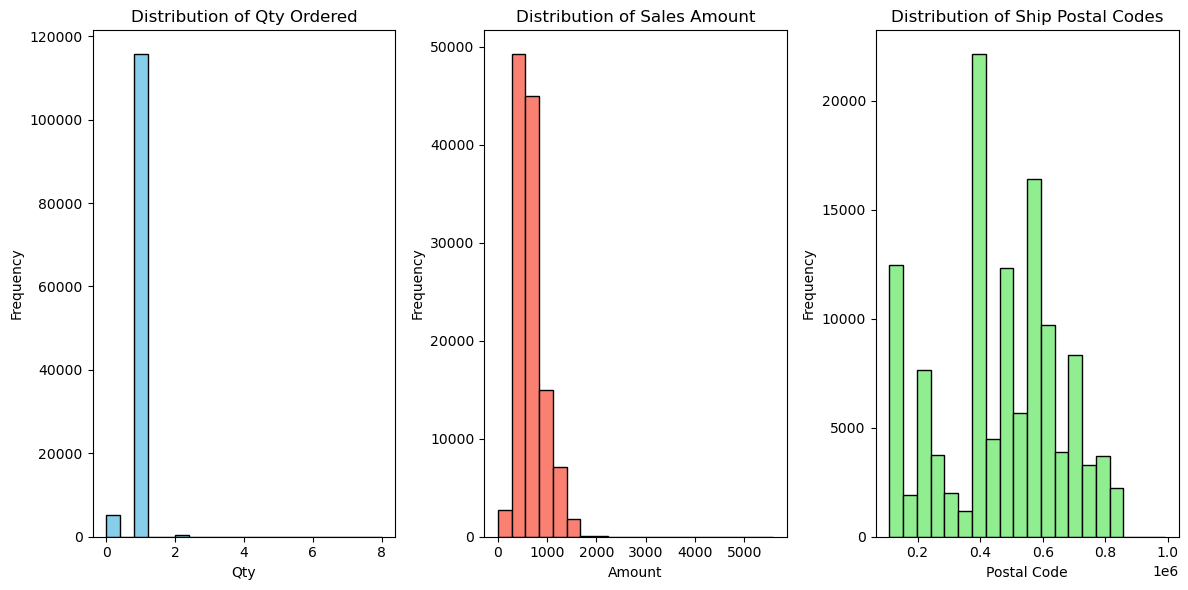

In [2]:
# Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df['Qty'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Qty Ordered')
plt.xlabel('Qty')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Amount'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Sales Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['ship-postal-code'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ship Postal Codes')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


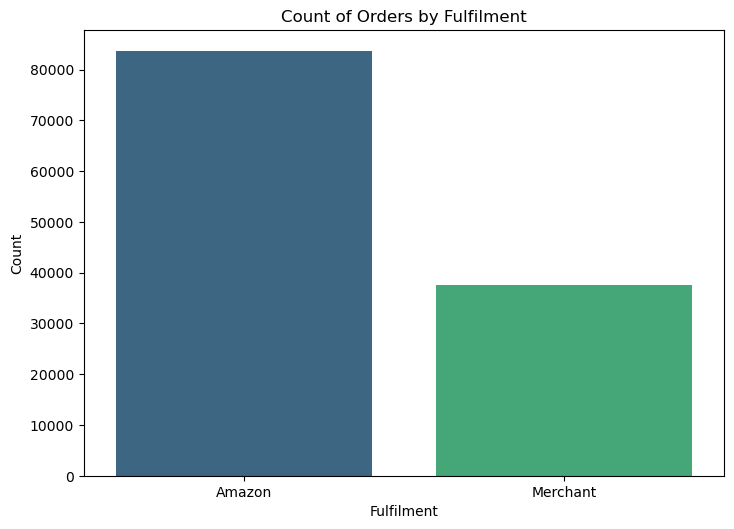

In [3]:
# Bar Plot
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 2)
fulfilment_counts = df['Fulfilment'].value_counts()
sns.barplot(x=fulfilment_counts.index, y=fulfilment_counts.values, palette='viridis')
plt.title('Count of Orders by Fulfilment')
plt.xlabel('Fulfilment')
plt.ylabel('Count')


plt.tight_layout()
plt.show()


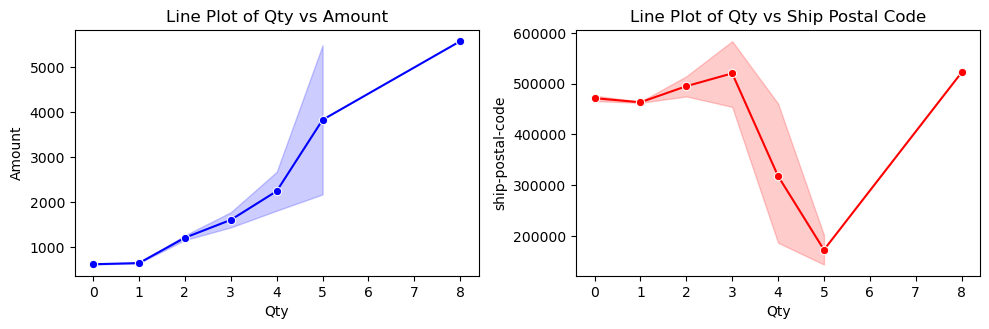

In [4]:
# Line plots
# Understanding the relationship between quantity sold and sales amount
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.lineplot(x='Qty', y='Amount', data=df, marker='o', color='blue')
plt.title('Line Plot of Qty vs Amount')

# Analyzing quantity sold across different shipping locations
plt.subplot(2, 2, 2)
sns.lineplot(x='Qty', y='ship-postal-code', data=df, marker='o', color='red')
plt.title('Line Plot of Qty vs Ship Postal Code')

plt.tight_layout()
plt.show()



# Visual Analysis

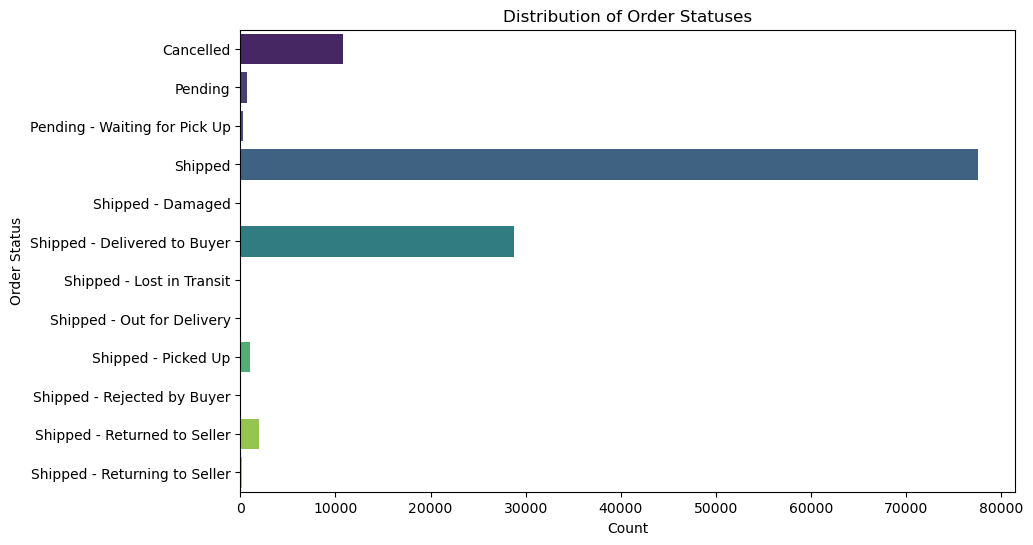

In [5]:
# Count plot for order statuses
plt.figure(figsize=(10, 6))
sns.countplot(y='Status', data=df, palette='viridis')
plt.title('Distribution of Order Statuses')
plt.xlabel('Count')
plt.ylabel('Order Status')
plt.show()



Monthly sales:
  YearMonth       Amount
0   2022-03    101683.85
1   2022-04  28831249.32
2   2022-05  26219850.75
3   2022-06  23421223.38


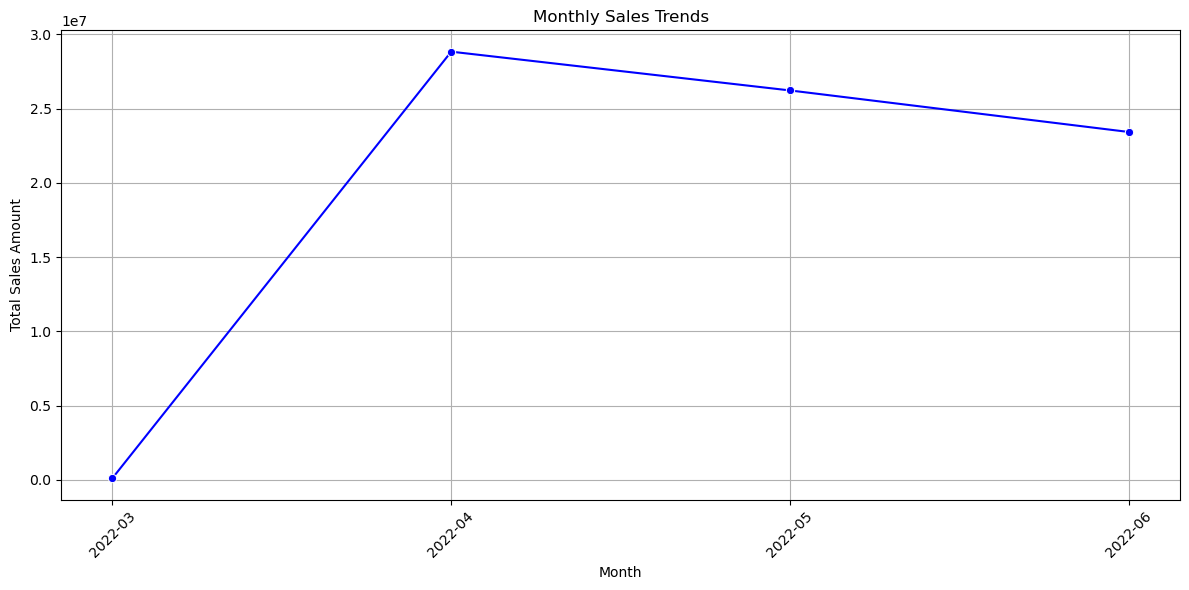

In [6]:
# monthly sales trends
df['YearMonth'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('YearMonth')['Amount'].sum().reset_index()

monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

print("\nMonthly sales:")
print(monthly_sales.head())

plt.figure(figsize=(12, 6))  
sns.lineplot(x='YearMonth', y='Amount', data=monthly_sales, marker='o', color='blue')  
plt.title('Monthly Sales Trends')  
plt.xlabel('Month')  
plt.ylabel('Total Sales Amount') 
plt.xticks(rotation=45) 
plt.grid(True)  
plt.tight_layout()  
plt.show()  
